### Scatter plot

In [1]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.18.1
ipykernel        : 6.29.5
ipywidgets       : 8.1.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : not installed
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3


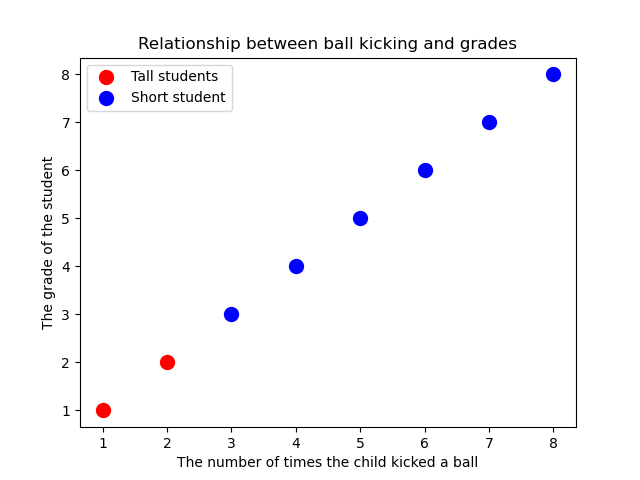

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 9)
y = x.copy()

f = plt.figure()

plt.scatter(x[:2], y[:2], s=100, c="red", label="Tall students")
plt.scatter(x[2:], y[2:], s=100, c="blue", label="Short student")
plt.xlabel("The number of times the child kicked a ball")
plt.ylabel("The grade of the student")
plt.title("Relationship between ball kicking and grades");
plt.legend();

### Take a look of label's children

In [3]:
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        print(" " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth + 2)
        
rec_gc(f.legend())

Legend
      Text(0, 0, '')
            Text(0, 0, 'Tall students')
            Text(0, 0, 'Short student')
  FancyBboxPatch((0, 0), width=1, height=1)


### Line plot

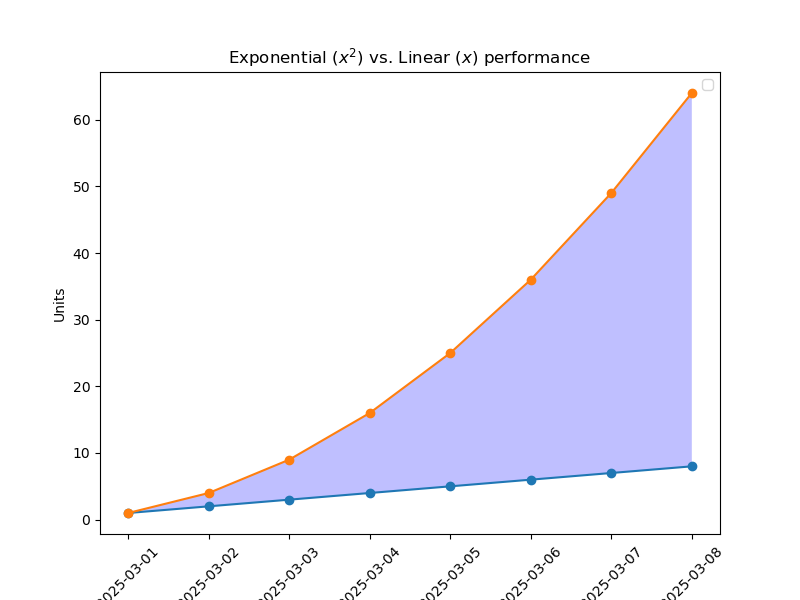

In [4]:
plt.figure(figsize=(8, 6))

observation_dates = np.arange("2025-03-01", "2025-03-09", dtype="datetime64[D]")

linear_data = np.arange(1, 9)
exponential_data = linear_data ** 2

plt.xlabel("Date")
plt.ylabel("Units")
plt.title("Exponential ($x^2$) vs. Linear ($x$) performance")
plt.legend(["Baseline", "Competition", "Us"])

plt.plot(observation_dates, linear_data, "-o", observation_dates, exponential_data, "-o");

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.gca().fill_between(
    observation_dates,
    linear_data, exponential_data,
    facecolor="blue",
    alpha=0.25
);

### Bar chart

In [5]:
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3);

In [6]:
new_xvals = []

for item in xvals:
    new_xvals.append(item + 0.3)

plt.bar(xvals, linear_data, width=0.3)
plt.bar(new_xvals, exponential_data, width=0.3, color="r");

In [7]:
from random import randint
linear_err = [randint(1, 4) for x in range(len(linear_data))]

plt.bar(xvals, linear_data, width=0.3, yerr=linear_err);

In [8]:
plt.bar(xvals, linear_data, width=0.3);
plt.bar(xvals, exponential_data, width=0.3, bottom=linear_data, color="r");

In [9]:
plt.barh(xvals, linear_data, height=0.3);
plt.barh(xvals, exponential_data, height=0.3, left=linear_data, color="r");

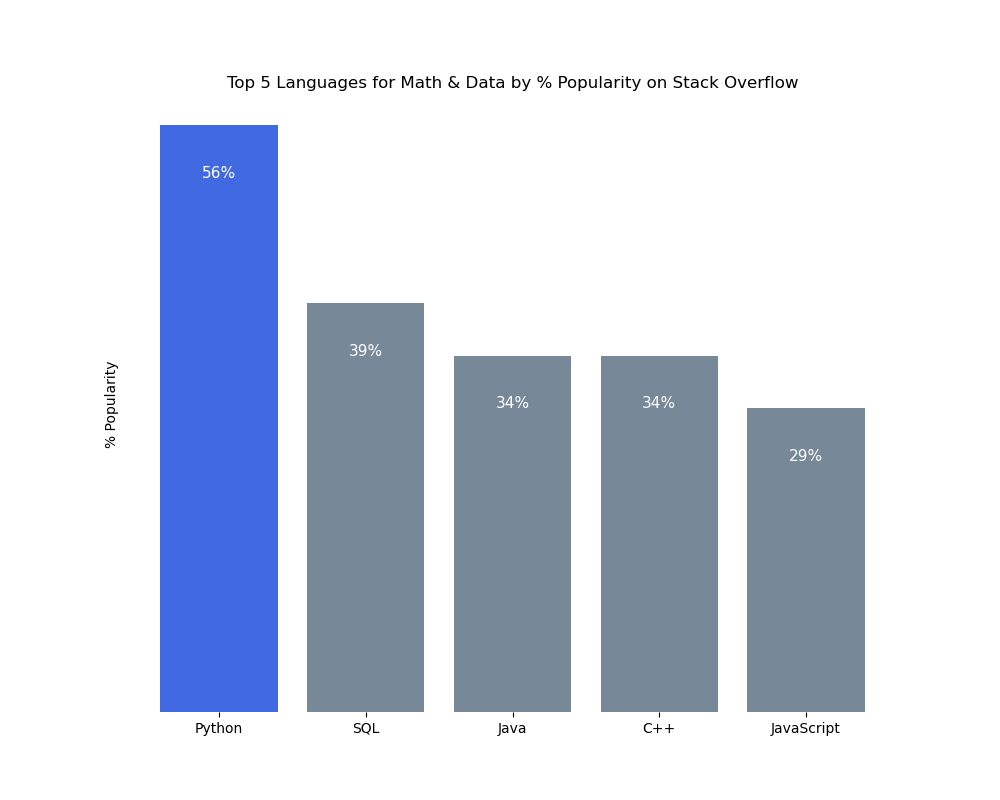

In [10]:
languages = ["Python", "SQL", "Java", "C++", "JavaScript"]
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(10, 8));

bars = plt.bar(pos, popularity, align="center", linewidth=0, color="lightslategrey");
bars[0].set_color("royalblue")
plt.xticks(pos, languages);
plt.yticks([])

plt.ylabel("% Popularity");
plt.title("Top 5 Languages for Math & Data by % Popularity on Stack Overflow")

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.gca().text(
        bar.get_x() + (bar.get_width() / 2),
        bar.get_height() - 5,
        str(int(height)) + "%",
        ha="center",
        color="w",
        fontsize=11
    )

### Subplot

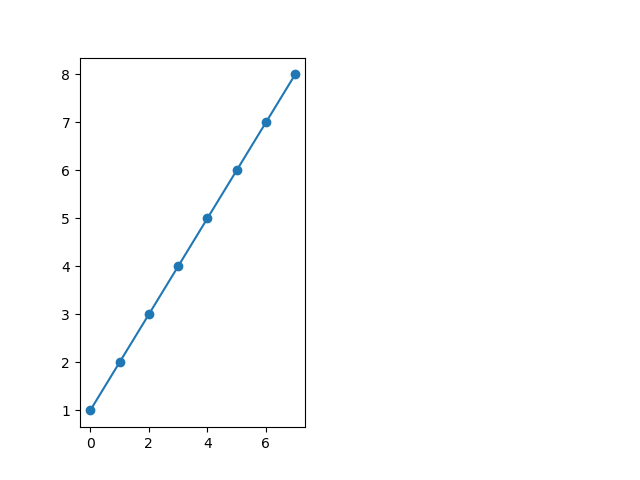

In [11]:
plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')

In [12]:
plt.subplot(1, 2, 1)
linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')

plt.subplot(1, 2, 2)
exponential_data = linear_data ** 2
plt.plot(exponential_data, '-o')

In [13]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x')

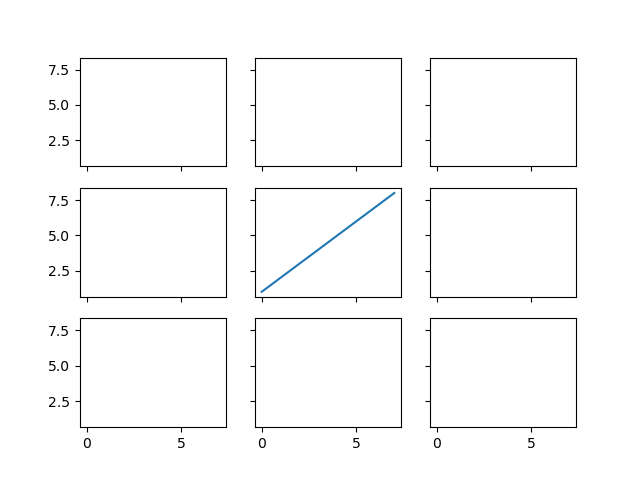

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax0)) = plt.subplots(
    3, 3, sharex=True, sharey=True
)
ax5.plot(linear_data, '-')

In [15]:
fig = plt.gcf()

for i in range(1, 7):
    if i != 5 and i != 3:
       ax = plt.subplot(2, 3, i)
       ax.text(0.5, 0.2, str(i), fontsize=18, ha="center") 

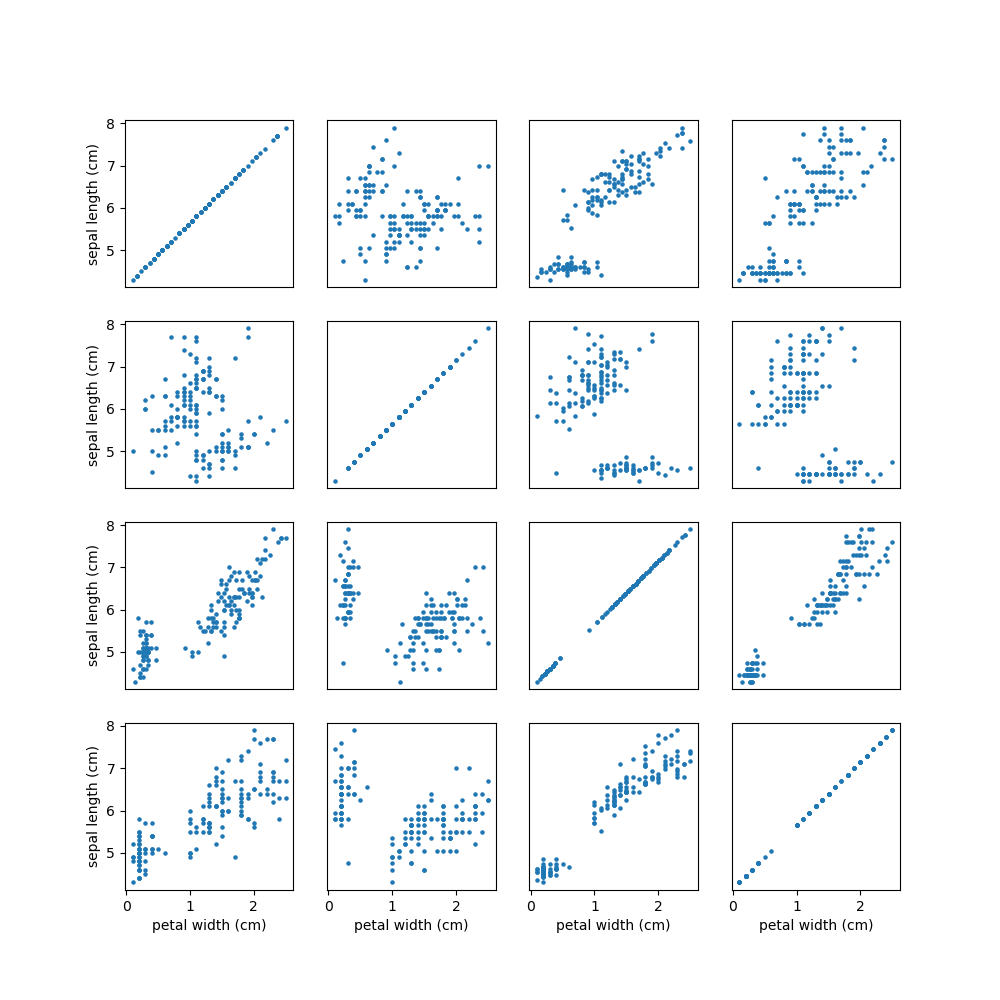

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
df, target = load_iris(return_X_y=True, as_frame=True)
cols = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

fig, axs = plt.subplots(len(cols), len(cols), figsize=(10, 10))

for i in range(len(cols)):
    for j in range(len(cols)):
        axs[i, j].scatter(df[cols[i]], df[cols[j]], s=5)
        
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)

        if i == len(cols) - 1:
            axs[i, j].get_xaxis().set_visible(True)
            axs[i, j].set_xlabel(cols[i])

        if j == 0:
            axs[i, j].get_yaxis().set_visible(True)
            axs[i, j].set_ylabel(cols[j])

### Histogram

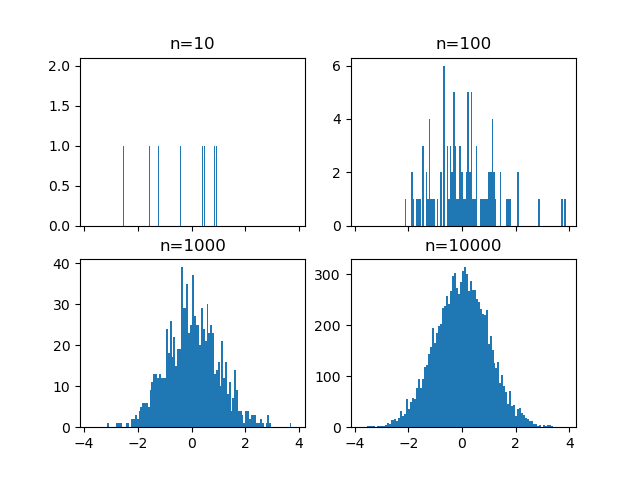

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title(f"n={sample_size}")

In [18]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)

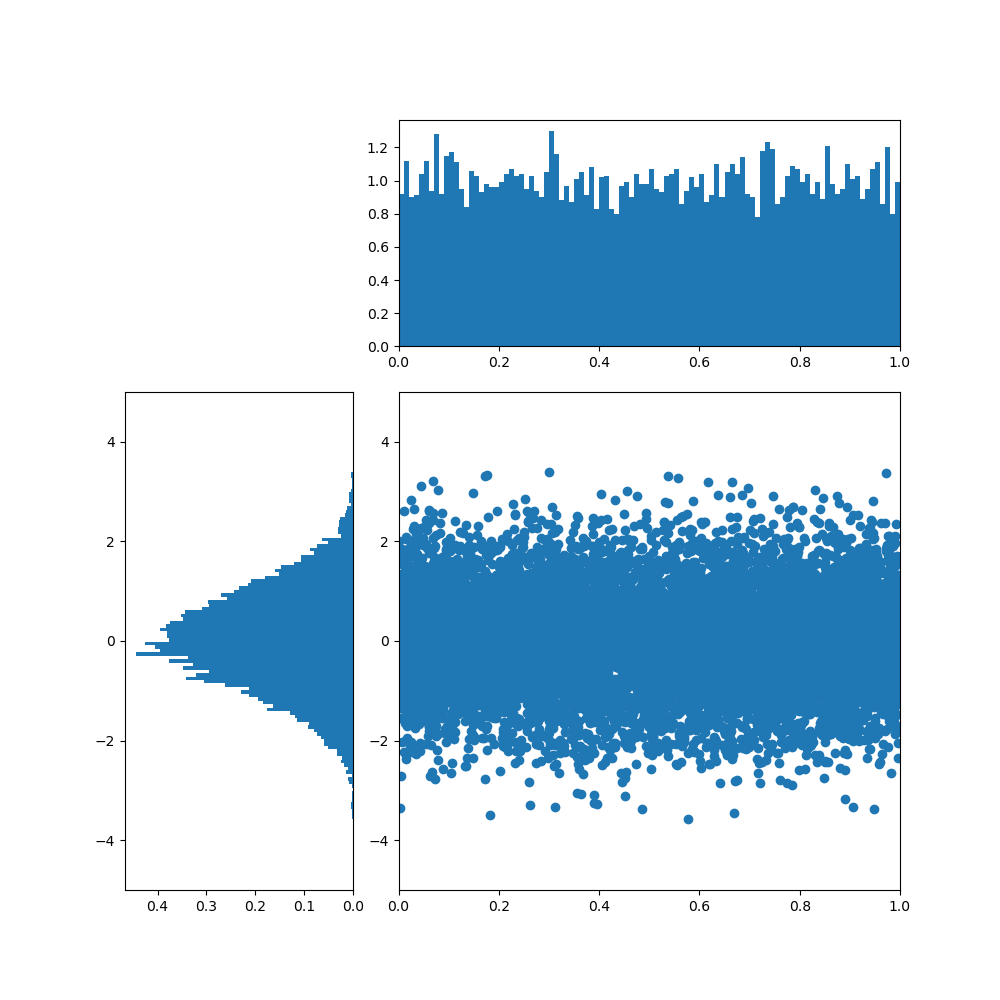

In [19]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10, 10))
gspec = gridspec.GridSpec(3, 3)

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100, density=True);
side_histogram.hist(Y, bins=100, density=True, orientation="horizontal");

side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

### Box plot

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({
    "normal": normal_sample,
    "random": random_sample,
    "gamma": gamma_sample
})

df, df.describe()

(        normal    random     gamma
 0     0.705111  0.959159  3.195870
 1    -0.471778  0.284250  2.344465
 2    -0.277868  0.442864  1.455755
 3     1.019310  0.301948  4.210888
 4     0.725927  0.247462  2.535211
 ...        ...       ...       ...
 9995  1.636574  0.127956  1.295410
 9996 -0.429607  0.606623  1.983290
 9997 -0.235368  0.913906  3.508319
 9998 -0.682363  0.515494  2.576059
 9999 -0.871653  0.438631  0.723138
 
 [10000 rows x 3 columns],
              normal        random         gamma
 count  10000.000000  10000.000000  10000.000000
 mean      -0.015749      0.499488      1.999565
 std        0.997792      0.290782      1.428072
 min       -3.715541      0.000226      0.006467
 25%       -0.700417      0.246566      0.963342
 50%       -0.018092      0.498582      1.661538
 75%        0.658215      0.750988      2.690882
 max        4.363710      0.999981     13.447302)

In [21]:
plt.boxplot(df["normal"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2446898a290>,
 'caps': [<matplotlib.lines.Line2D at 0x2446d899ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2446dcb04c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2446fb29c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2446fb2afe0>],
 'means': []}

In [22]:
plt.boxplot([df["normal"], df["random"], df["gamma"]], whis=[0, 100]);

In [23]:
plt.hist(df["gamma"], bins=100);

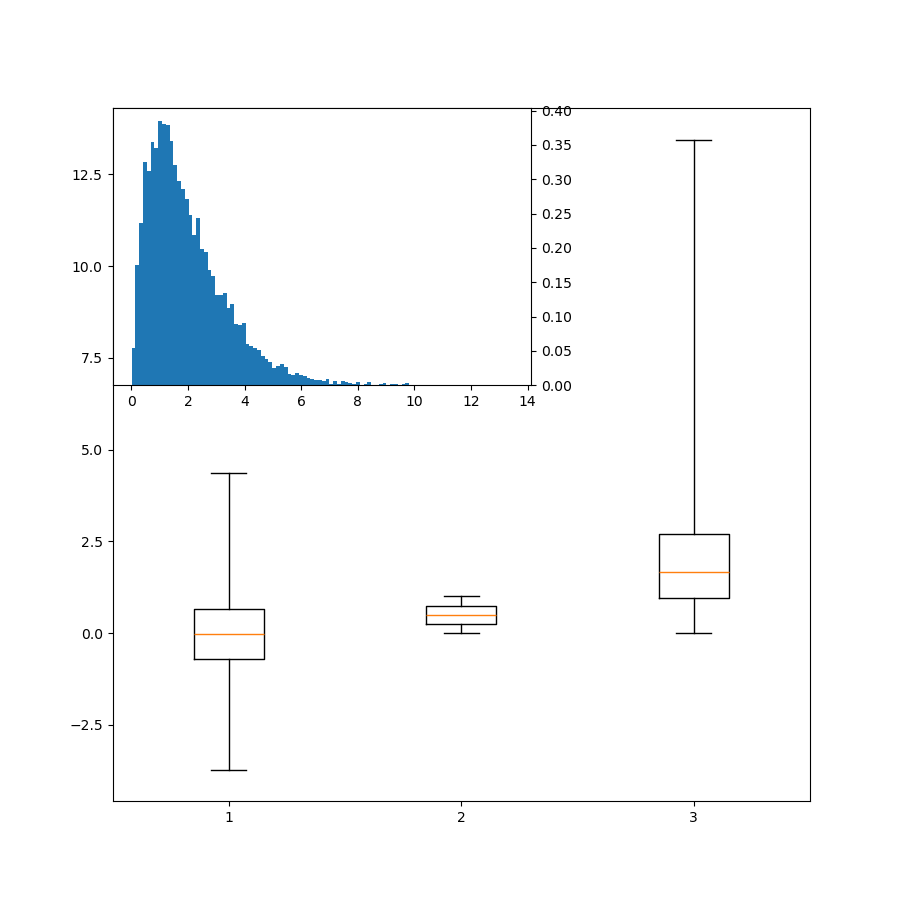

In [24]:
plt.figure(figsize=(9, 9))

plt.boxplot([df["normal"], df["random"], df["gamma"]], whis=[0, 100])

ax2 = plt.gca().inset_axes([0, 0.6, 0.6, 0.4])
ax2.hist(df["gamma"], bins=100, density=True)

ax2.yaxis.tick_right();

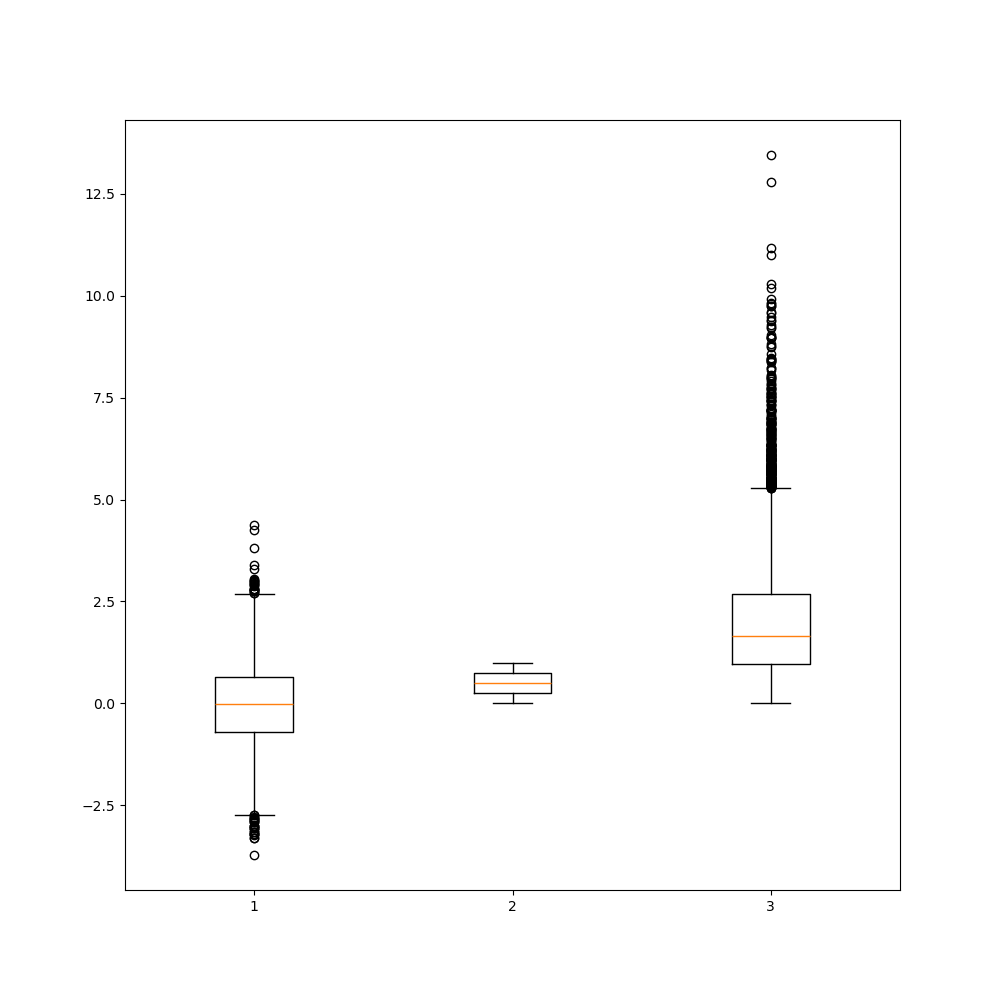

In [25]:
plt.figure(figsize=(10, 10))
plt.boxplot([df["normal"], df["random"], df["gamma"]]);

### Heatmap

In [26]:
# df = pd.read_csv("NYC hourly traffic.csv")

# df["Date"] = df["Date"].apply(pd.to_datetime)

# df.head()

In [27]:
# sample = df.query("`Plaza ID` == 5 & Date > '2016-12-30' & Date < '2017-05-01'")
# sample

In [28]:
# HOURS_OF_DAY = 24
# DAYS_OF_WEEK = 7
# plt.hist(sample["Hour"], bins=HOURS_OF_DAY, weights=sample["# Vehicle - E-ZPass"]);

In [29]:
# sample["Day of Week"] = sample["Date"].dt.dayofweek
# plt.hist(sample["Day of Week"], bins=DAYS_OF_WEEK, weights=sample["# Vehicle - E-ZPass"]);

In [30]:
# plt.figure(figsize=(12, 8))
# plt.hist2d(
#     sample["Hour"],
#     sample["Day of Week"],
#     bins=[HOURS_OF_DAY, DAYS_OF_WEEK],
#     weights=sample["# Vehicle - E-ZPass"]
# )

# plt.colorbar()

### Animation

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [32]:
sample_size = 100
normal_distribution = np.random.normal(loc=0.0, scale=1.0, size=sample_size)

In [33]:
def update(
        curr: int,
):
    if curr == sample_size:
        a.event_source.stop()
    
    plt.cla()
    bins = np.arange(-4, 4, 0.5)

    plt.hist(normal_distribution[: curr], bins=bins)
    plt.axis([-4, 4, 0, 30]) # Set axis limits

    plt.gca().set_title("Sampling the Normal Distribution")
    plt.gca().set_ylabel("Frequency")
    plt.gca().set_xlabel("Value")
    plt.annotate(f"n = {curr}", [3, 27])

C:\Users\USER\AppData\Local\Temp\ipykernel_2772\1409289487.py:1: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  a = animation.FuncAnimation(plt.figure(), update, interval=100)


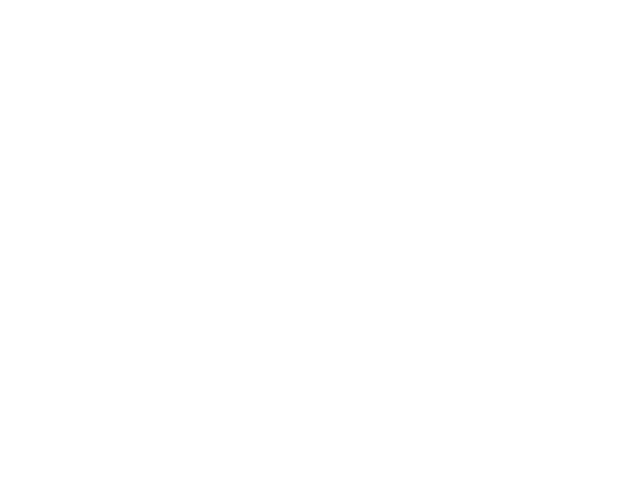

In [34]:
a = animation.FuncAnimation(plt.figure(), update, interval=100)
plt.show()

### Widget demonstration

In [35]:
from ipywidgets import interact
import ipywidgets as widgets

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wipeout.csv")
df = df.set_index(pd.to_datetime(df["timestamp"]))
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'wipeout.csv'

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
potential_columns = []
for col in df.columns:
    if df[col].dtype != "object":
        potential_columns.append(col)

In [ ]:
def plot_data(col_names):
    DEFAULT_COLOR = "b"
    ADDITIONAL_COLOR = "r"

    plt.figure(figsize=(12, 8))
    plt.gcf().suptitle(str(col_names))
    if len(col_names) == 2:
        plt.plot(df[list(col_names)[0]], DEFAULT_COLOR)
        plt.twinx()
        plt.plot(df[list(col_names)[1]], ADDITIONAL_COLOR)
    else:
        plt.plot(df[list(col_names)[0]], DEFAULT_COLOR)

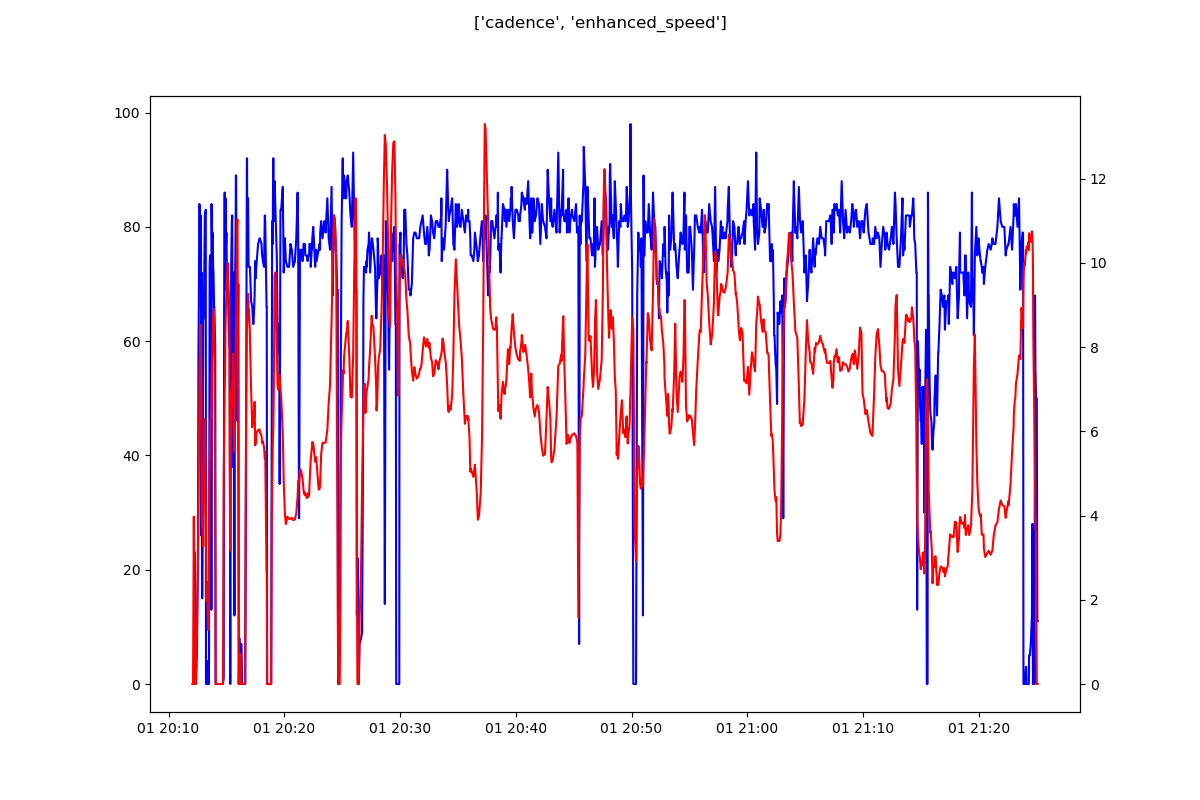

In [ ]:
plot_data(["cadence", "enhanced_speed"])

interactive(children=(SelectMultiple(description='Columns', index=(0,), options=('cadence', 'distance', 'enhan…

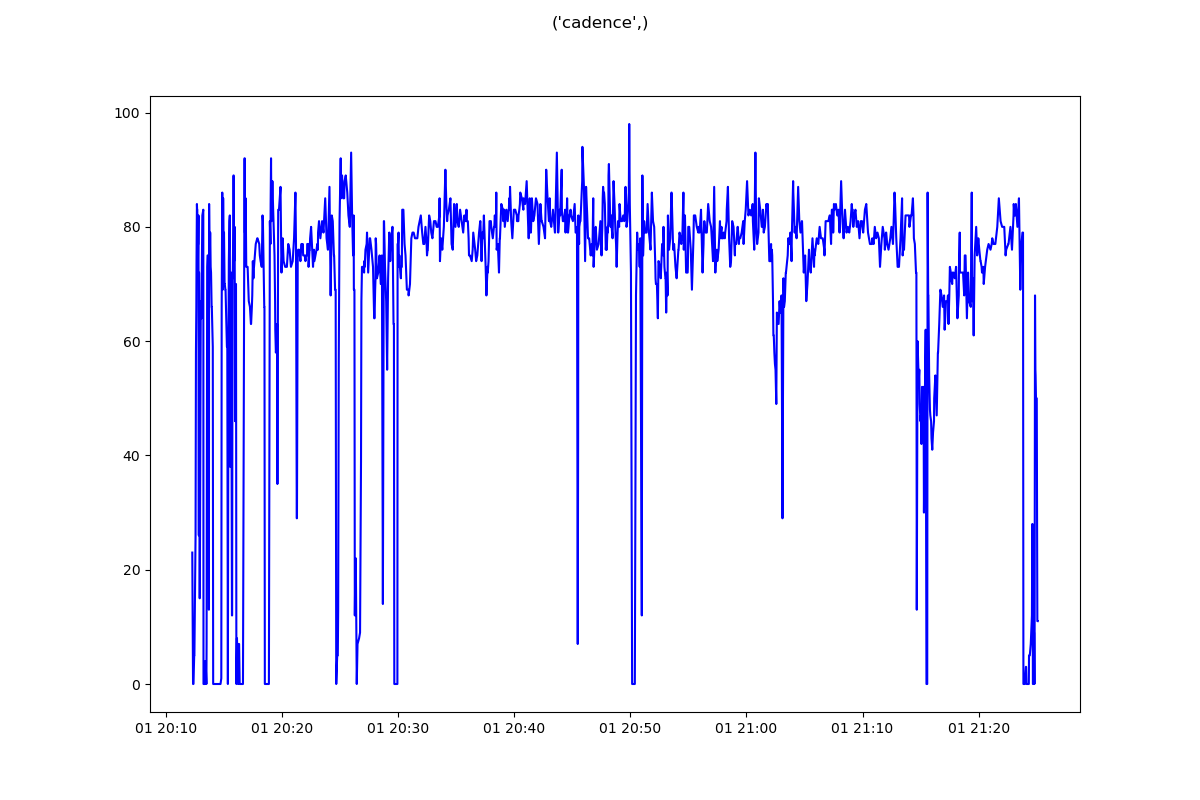

In [ ]:
# TODO: select another option without generating new figure (overlap the original one)
@interact(
    col_names=widgets.SelectMultiple(
        options=potential_columns,
        value=(potential_columns[0], ),
        description="Columns"
    )
)
def plot_data(col_names):
    DEFAULT_COLOR = "b"
    ADDITIONAL_COLOR = "r"

    plt.figure(figsize=[12, 8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) == 2:
        plt.plot(df[list(col_names)[0]], DEFAULT_COLOR)
        plt.twinx()
        plt.plot(df[list(col_names)[1]], ADDITIONAL_COLOR)
    else:
        plt.plot(df[list(col_names)], DEFAULT_COLOR)

interactive(children=(IntRangeSlider(value=(80, 100), continuous_update=False, description='HR Range:', max=18…

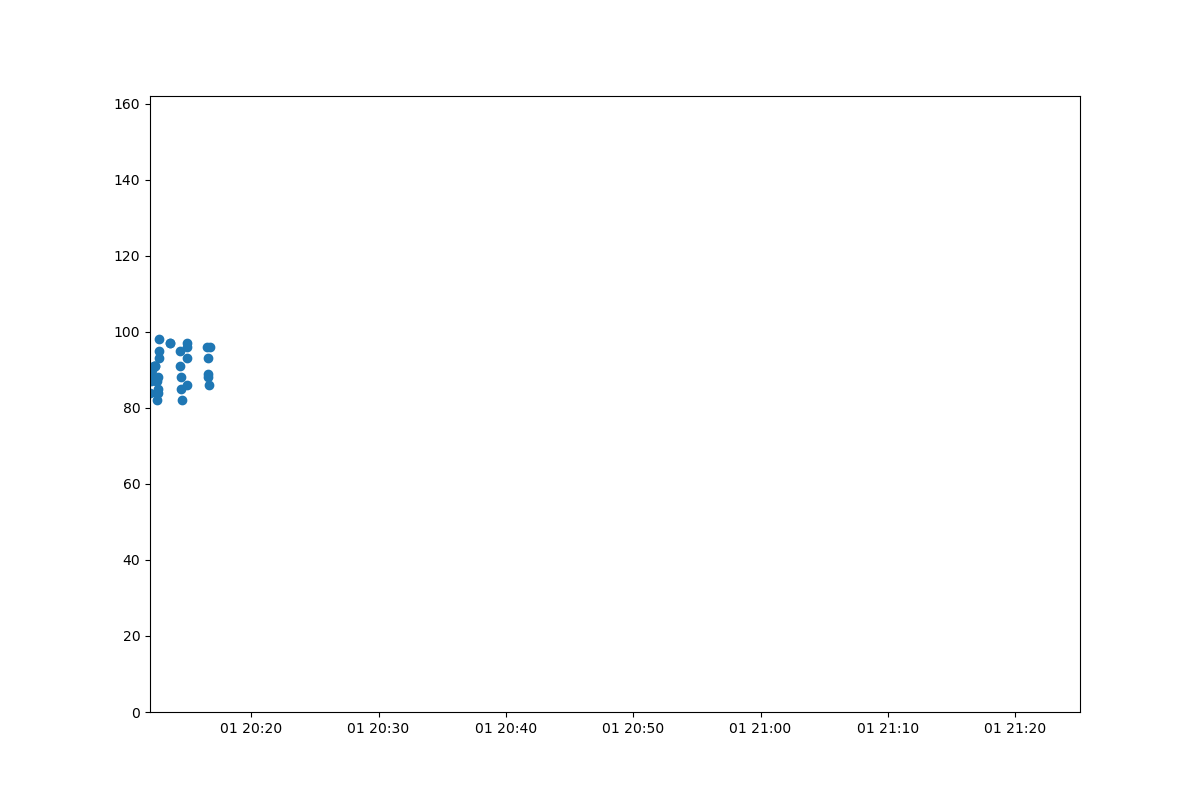

In [ ]:
# haven't studied!
@interact(heart_rate_bounds=widgets.IntRangeSlider(
    value=[80, 100],
    min=0,
    max=180,
    step=1,
    description='HR Range:',
    continuous_update=False,
    readout_format='d',),
    start=widgets.Text(
    value=str(df.index[0]),
    description='Start Time:'),
    end=widgets.Text(
    value=str(df.index[-1]),
    description='End Time:'))

def plot_hr(heart_rate_bounds, start, end):
    plt.figure(figsize=[12,8])
    
    plt.xlim(left=df.index[0],right=df.index[-1])
    plt.ylim(0,max(df["heart_rate"]))
    
    ndf=df[(df["heart_rate"]>heart_rate_bounds[0]) & 
           (df["heart_rate"]<heart_rate_bounds[1]) & 
           (df.index>start) & (df.index<end)]
    plt.scatter(ndf.index,ndf["heart_rate"])

### Pandas plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("seaborn-v0_8-colorblind")

In [ ]:
np.random.seed(42)

df = pd.DataFrame(
    {"A": np.random.randn(365).cumsum(0),
    "B": np.random.randn(365).cumsum(0) + 20,
    "C": np.random.randn(365).cumsum(0) - 20},
    index=pd.date_range("1/1/2017", periods=365))
df

,A,B,C
2017-01-01,0.496714,19.598780,-19.804155
2017-01-02,0.358450,19.822872,-20.782528
2017-01-03,1.006138,19.835464,-20.374275
2017-01-04,2.529168,19.933141,-22.076858
2017-01-05,2.295015,19.160131,-21.047703
...,...,...,...
2017-12-27,1.114602,7.076895,24.856687
2017-12-28,2.647341,7.095329,24.819464
2017-12-29,2.538581,7.442911,25.547094
2017-12-30,2.940293,6.903151,25.599040


<Axes: >

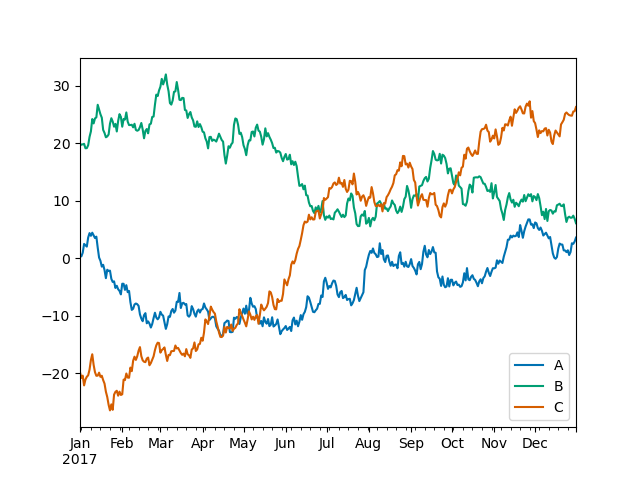

In [ ]:
df.plot()

<Axes: xlabel='A', ylabel='B'>

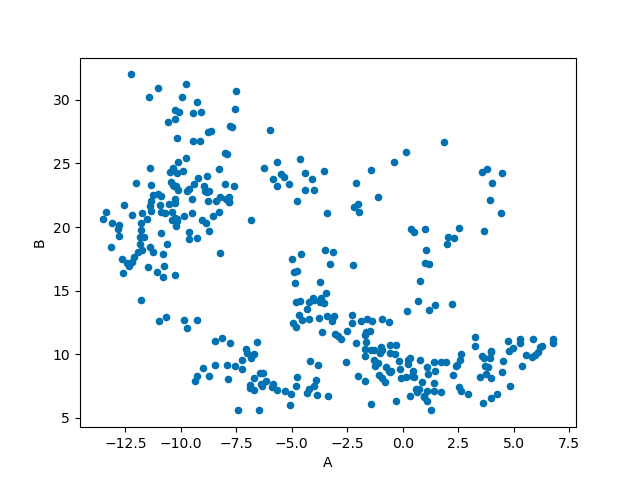

In [ ]:
df.plot("A", "B", kind="scatter")

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<Axes: xlabel='A', ylabel='C'>

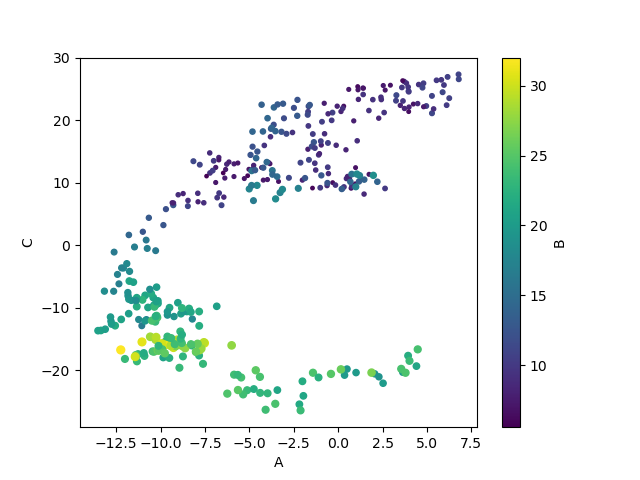

In [ ]:
df.plot.scatter("A", "C", c="B", s=df["B"], colormap="viridis")

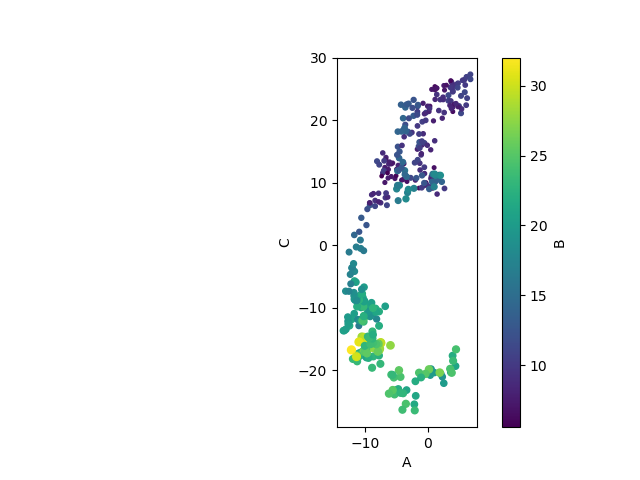

In [ ]:
ax = df.plot.scatter("A", "C", c="B", s=df["B"], colormap="viridis")
ax.set_aspect("equal")

<Axes: >

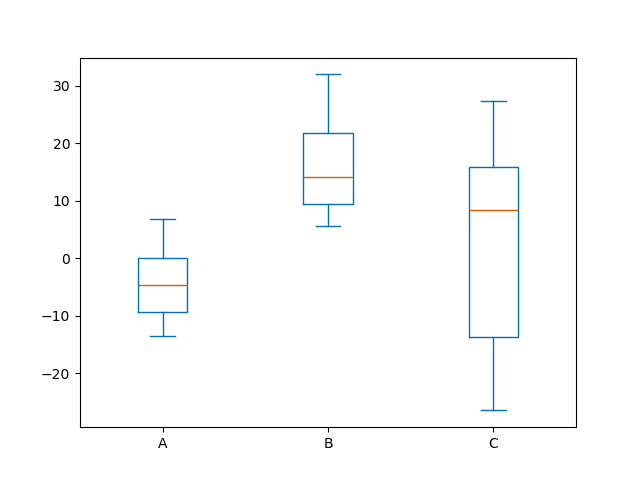

In [ ]:
df.plot.box()

<Axes: ylabel='Frequency'>

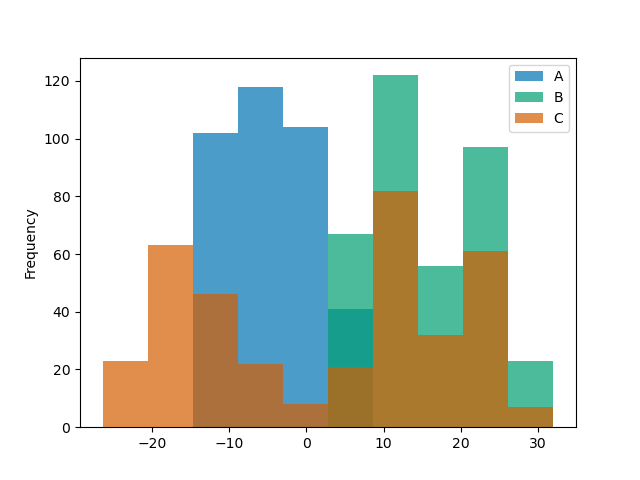

In [ ]:
df.plot.hist(alpha=0.7)

c:\Users\USER\anaconda3\envs\data_science\lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


<Axes: ylabel='Density'>

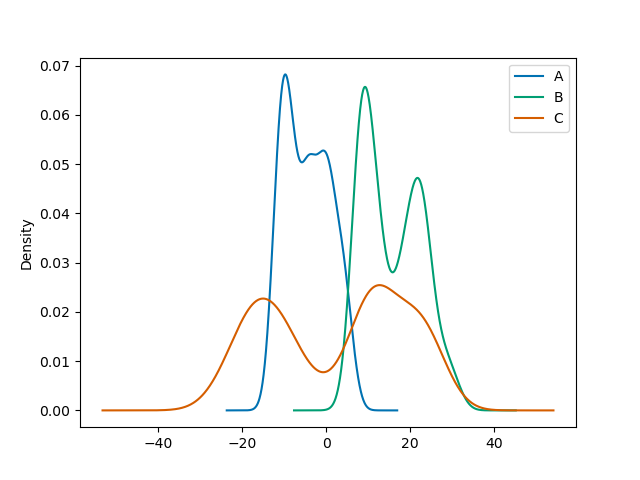

In [ ]:
df.plot.kde()

In [ ]:
iris_dataset = pd.read_csv("iris.csv")
iris_dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


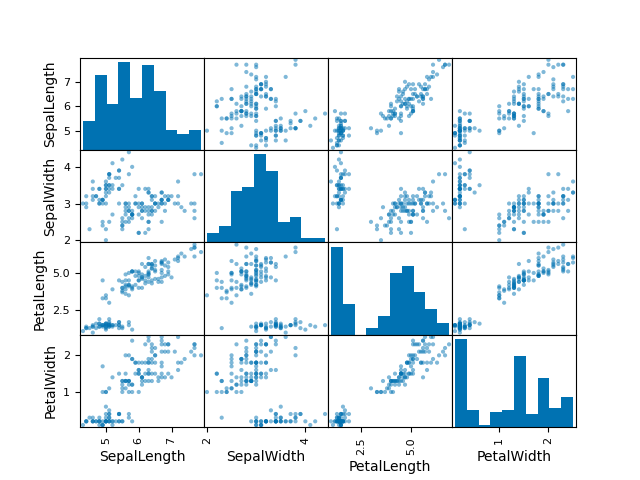

In [ ]:
pd.plotting.scatter_matrix(iris_dataset);

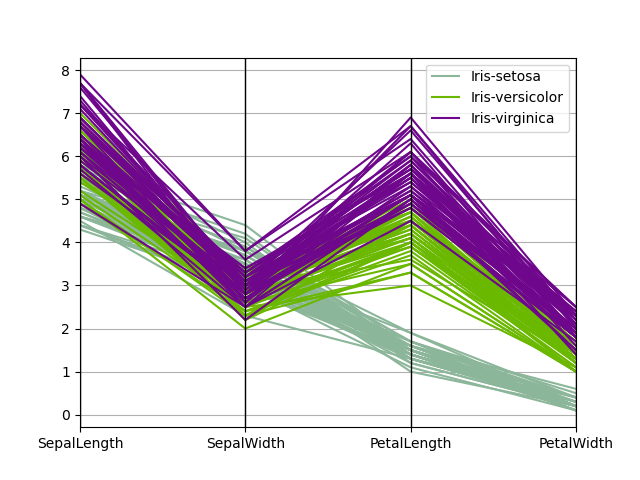

In [ ]:
plt.figure()
pd.plotting.parallel_coordinates(iris_dataset, "Name");

### Mapping

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# TODO 怎麼設定統一的figsize
# import matplotlib as mpl
# mpl.reParams["figure.figsize"] = [16.0, 8.0]

In [ ]:
df = pd.read_csv("wipeout.csv")
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
0,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
1,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
3,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
4,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777
